In [6]:
# Sam Brown
# Sam_brown@mines.edu
# July 7
# Goal: Run Clustering algorithms on stations and their average slip severity and pre slip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('station_standards.csv')

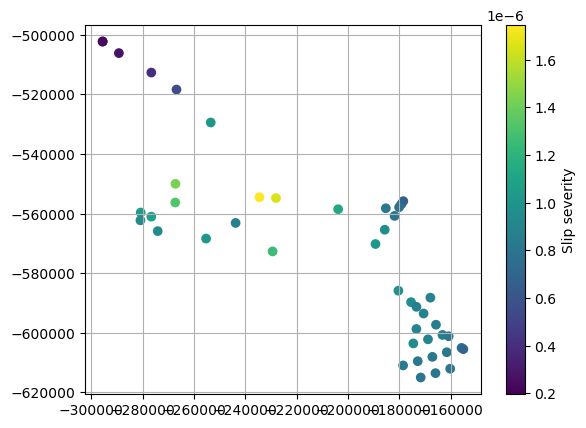

In [7]:

x = df['x_cor']
y = df['y_cor']

fig, ax = plt.subplots()

scatter = ax.scatter(x,y, c = df['slip_severity'])
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Slip severity')

ax.grid(True)

plt.show()

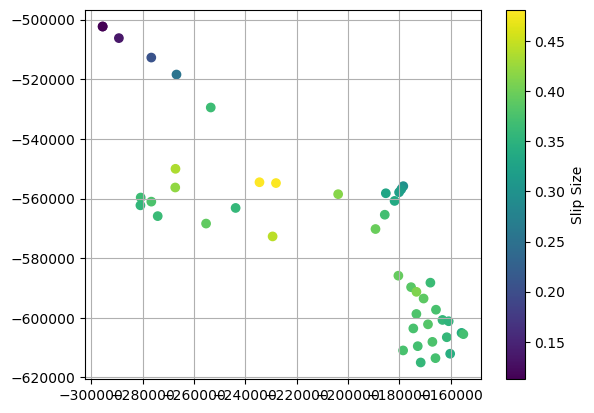

In [8]:
x = df['x_cor']
y = df['y_cor']

fig, ax = plt.subplots()

scatter = ax.scatter(x,y, c = df['slip_size'])
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Slip Size')

ax.grid(True)

plt.show()

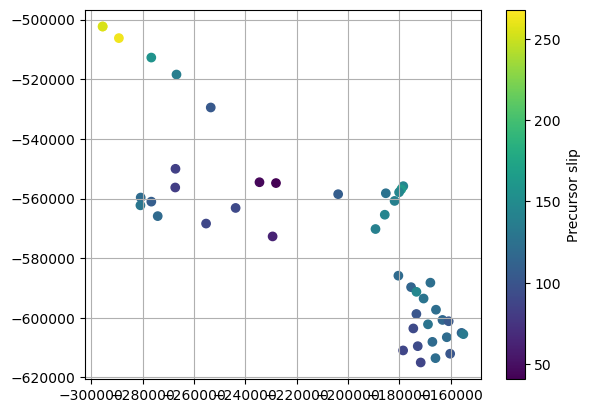

In [9]:
x = df['x_cor']
y = df['y_cor']

fig, ax = plt.subplots()

scatter = ax.scatter(x,y, c = df['pre-slip_area'])
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Precursor slip')

ax.grid(True)

plt.show()

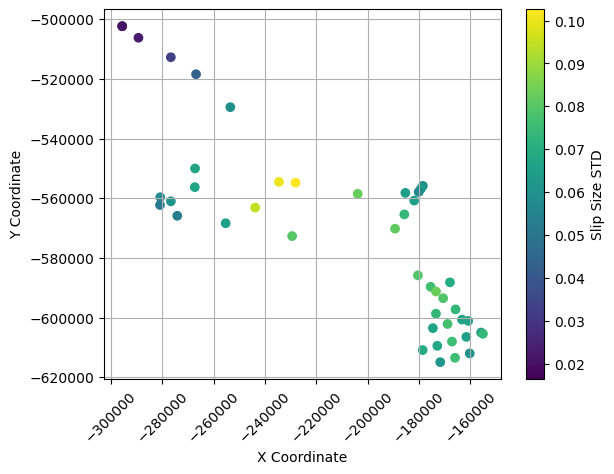

In [22]:
x = df['x_cor']
y = df['y_cor']

fig, ax = plt.subplots()

scatter = ax.scatter(x,y, c = df['slip_size_sd'])
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Slip Size STD')

ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.tick_params(axis="x", labelrotation=45)

ax.grid(True)

plt.show()

In [75]:
# Clustering 

# Need to add slip severity to increase the dimension of clustering
df['slip_severity'] = df['slip_severity'] * 10 # More influence
X = df[['x_cor', 'y_cor', 'slip_severity']] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.2, min_samples=4) 
df['cluster'] = dbscan.fit_predict(X_scaled)

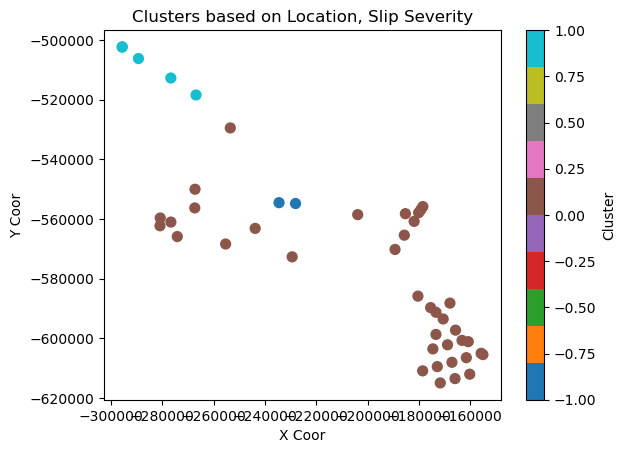

In [79]:
plt.scatter(df['x_cor'], df['y_cor'], c=df['cluster'], cmap='tab10', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('X Coor')
plt.ylabel('Y Coor')
plt.title('Clusters based on Location, Slip Severity')
plt.show()

In [81]:
df['pre-slip_area'] = df['pre-slip_area'] * 10
X = df[['x_cor', 'y_cor', 'pre-slip_area']]
X_scaled = StandardScaler().fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.2, min_samples=4) 
df['cluster'] = dbscan.fit_predict(X_scaled)

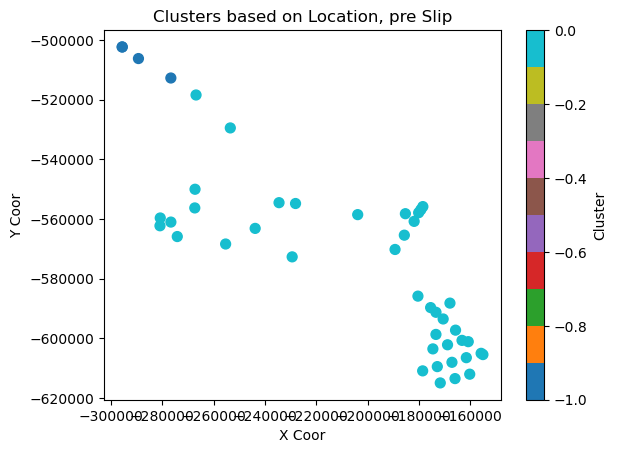

In [83]:
plt.scatter(df['x_cor'], df['y_cor'], c=df['cluster'], cmap='tab10', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('X Coor')
plt.ylabel('Y Coor')
plt.title('Clusters based on Location, pre Slip')
plt.show()